# HEART DISEASE CLASSIFICATION MINI-APP

## Part 1: Building The ML Model

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Reading the data

In [2]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')

In [3]:
df.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0


### Data analysis and visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [5]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [6]:
df['target'].value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

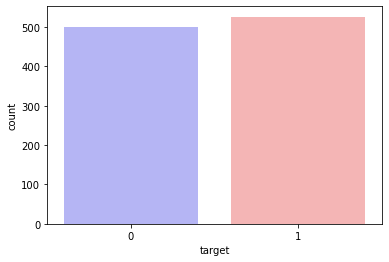

In [7]:
# plot target counts
sns.countplot(x="target", data=df, palette="bwr")

<AxesSubplot:xlabel='sex', ylabel='count'>

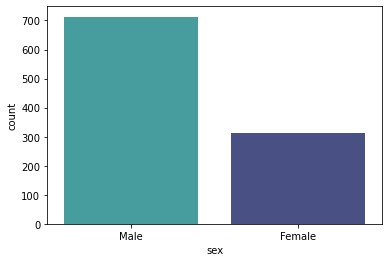

In [8]:
#plot counts based on gender
sns.countplot(x='sex', data=df, palette="mako_r")

<AxesSubplot:xlabel='sex'>

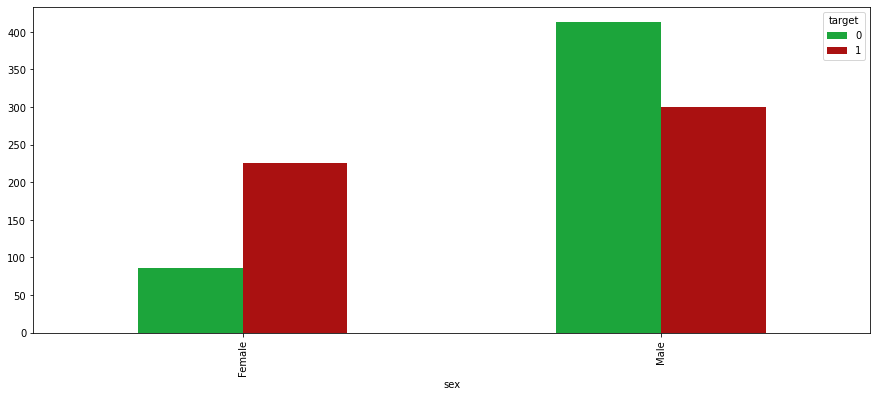

In [9]:
# the following lines of code will analyze gender Vs Target
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])

### Data preprocessing

In [10]:
# Coding Categorical data into numerical
encoder = LabelEncoder()
cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope',
        'vessels_colored_by_flourosopy', 'thalassemia']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [11]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0


In [12]:
y = df.target.values
X = df.drop(['target'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
accuracies = {}

### Applying the ML model

In [13]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(random_state=0, solver = 'lbfgs', multi_class = 'auto', max_iter=1000)
lrmodel.fit(X_train, y_train)
lr_pred = lrmodel.predict(X_test)

In [14]:
score = lrmodel.score(X_test,y_test)
print(score)

0.77431906614786


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train, y_train)
Knn_pred = knn.predict(X_test)

In [16]:
scoreknn = knn.score(X_test,y_test)
print(scoreknn)

0.8832684824902723


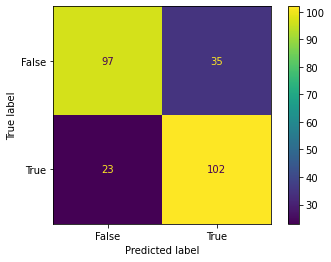

In [17]:
#Logistic Regression confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, lr_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

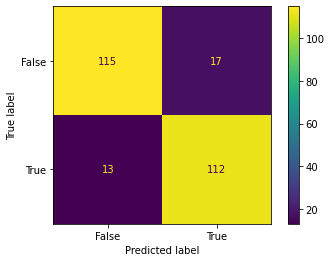

In [18]:
#knn confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, Knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

Since Knn has better score we are goining to use it as the ML model for our classifier

## Part 2: Building The GUI

### Importing Tkinter

In [19]:
from tkinter import *
import tkinter as tk

### Building the app

In [21]:
def check_inputs():
    if age.get() == "":
        print("Age Field is Empty!!")
        Label(win,text="Age Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=600)


    elif rbp.get() == "":
        print("Resting Blood Pressure Field is Empty!!")
        Label(win,text="Resting Blood Pressure Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=600)

    elif chol.get() == "":
        print("Cholestrol Field is Empty!!")
        Label(win,text="Cholestrol Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=600)

    elif heart_rate.get() == "":
        print("Heart Rate Field is Empty!!")
        
        Label(win,text="Heart Rate Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=600)
    elif peak.get() == "":
        print("Depression By Exercise Field is Empty!!")
        Label(win,text="Depression By Exercise Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=600)

    else:
        predict()


def predict():
    gender_dict = {"Male":1, "Female":0}
    fbs_dict = {"True":1, "False":0}
    eia_dict = {"True":1, "False":0}
    cp_dict = {"1: typical angina":0,"2: atypical angina":1,"3: non-anginal pain":2,"4: asymptomatic":3}
    thal_dict = {"0: No Test":0,"1: Fixed Defect":1,"2: Normal Flow":2,"3: Reversible Defect":3}
    Pred_dict = {0:"Prediction: No Heart Disease Detected", 1:"Prediction: Signs of Heart Disease Deteced\nYou should consult with your Doctor!"}
    
    data = [float(age.get()),gender_dict[str(radio.get())], cp_dict[str(variable.get())], float(rbp.get()),
           float(chol.get()),fbs_dict[str(radio_fbs.get())], int(str(variable_ecg.get())) - 1 , float(heart_rate.get()),
           eia_dict[str(radio_eia.get())], float(peak.get()), int(str(variable_slope.get())) - 1,int(str(variable_n_vessels.get())) - 1,
           thal_dict[str(variable_thal.get())]]

    #knn model is used
    prediction = knn.predict(np.array(data).reshape(1,13))
    pred_label = Pred_dict[prediction.tolist()[0]]
    Label(win,text=pred_label,fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=600)



def reset():
    age.set("")
    rbp.set("")
    chol.set("")
    heart_rate.set("")
    peak.set("")




win =  Tk()

win.geometry("450x640")
win.configure(background="#Eaedee")
win.title("Heart Disease Classifier")
win.iconbitmap('icon.ico')

title = Label(win, text="Heart Disease Classifier", bg="grey", width="240", height="2", fg="white", font = ("Arial 20 italic")).pack()

age = Label(win, text="Age in Years", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=70)

rbp = Label(win, text="Resting Blood Pressure ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=105)

chol = Label(win, text="Cholestrol mg/dl ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=145)

heart_rate = Label(win, text="Maximum Heart Rate ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=185)

peak = Label(win, text="Depression By Exercise ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=225)


  
Gender = Label(win, text="Gender ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=265)

radio = StringVar()
Male = Radiobutton(win, text="Male",bg="#Eaedee",variable=radio,value="Male",font = ("Verdana 12")).place(x=220,y=265)
Female = Radiobutton(win, text="Female",bg="#Eaedee",variable=radio,value="Female",font = ("Verdana 12")).place(x=320,y=265)

FBS = Label(win, text="Fasting Blood Pressure ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=285)

radio_fbs = StringVar()
Male = Radiobutton(win, text="True",bg="#Eaedee",variable=radio_fbs,value="True",font = ("Verdana 12")).place(x=220,y=285)
Female = Radiobutton(win, text="False",bg="#Eaedee",variable=radio_fbs,value="False",font = ("Verdana 12")).place(x=320,y=285)

EIA = Label(win, text="Exercise Induced Angina",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=305)

radio_eia = StringVar()
Male = Radiobutton(win, text="True",bg="#Eaedee",variable=radio_eia,value="True",font = ("Verdana 12")).place(x=220,y=305)
Female = Radiobutton(win, text="False",bg="#Eaedee",variable=radio_eia,value="False",font = ("Verdana 12")).place(x=320,y=305)


cp = Label(win,text="Chest Pain ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=345)
variable = StringVar(win)
variable.set("CP")
w = OptionMenu(win, variable, "1: typical angina","2: atypical angina","3: non-anginal pain","4: asymptomatic")
w.place(x=220,y=345)

ecg = Label(win,text="Resting ECG ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=385)
variable_ecg = StringVar(win)
variable_ecg.set("ECG")
w_ecg = OptionMenu(win, variable_ecg, "1","2","3")
w_ecg.place(x=220,y=385)


exer_slope = Label(win,text="Slope of Exercise ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=425)
variable_slope = StringVar(win)
variable_slope.set("Slope")
w_slope = OptionMenu(win, variable_slope, "1","2","3")
w_slope.place(x=220,y=425)


thal_label = Label(win,text="Thallium Stress ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=465)
variable_thal = StringVar(win)
variable_thal.set("Thal")
w_thal = OptionMenu(win, variable_thal, "0: No Test","1: Fixed Defect","2: Normal Flow","3: Reversible Defect")
w_thal.place(x=220,y=465)


n_vessels = Label(win,text="Number Vessels ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=505)
variable_n_vessels = StringVar(win)
variable_n_vessels.set("N_Vessels")
w_n_vessels = OptionMenu(win, variable_n_vessels, "1","2","3","4")
w_n_vessels.place(x=220,y=505)


age = StringVar()
rbp = StringVar()
chol = StringVar()
heart_rate = StringVar()
peak  = StringVar()
Gender = StringVar()
FBS  = StringVar()
EIA  = StringVar()
cp  = StringVar()
ecg  = StringVar()
exer_slope  = StringVar()
thal_label  = StringVar()
n_vessels  = StringVar()

entry_age = Entry(win,textvariable = age,width=30)
entry_age.place(x=220,y=70)

entry_rbp = Entry(win,textvariable = rbp,width=30)
entry_rbp.place(x=220,y=105)

entry_chol = Entry(win,textvariable = chol,width=30)
entry_chol.place(x=220,y=145)

entry_heart_rate = Entry(win, textvariable = heart_rate,width=30)
entry_heart_rate.place(x=220,y=185)

entry_peak = Entry(win,textvariable = peak,width=30)
entry_peak.place(x=220,y=225)

reset = Button(win, text="Reset", width="12",height="1",activebackground="red",command=reset, bg="Pink",font = ("Calibri 12 ")).place(x=12, y=560)
submit = Button(win, text="Classify", width="12",height="1",activebackground="violet", bg="Pink",command=check_inputs,font = ("Calibri 12 ")).place(x=220, y=560)


win.mainloop()

The app displays the predicition